<font size="+3"><strong>Predicting Price with Size</strong></font>

<font size="+1"><strong>1. Importing Libraries</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from glob import glob # Used to import multiple csv files

In this project, we're working for a client who wants to create a model that can predict the price of apartments in the city of  Distrito Federal — with a focus on apartments that cost less than $400,000 USD. The client has collected 5 different csv files and wants to clean then and as well join them together.

Our goal here is to clean the data and save it as a new csv file.

# Prepare Data

<font size="+1"><strong>1. Clean Dataset</strong></font>

In [2]:
df1 = pd.read_csv("data/mexico-city-real-estate-1.csv")
df1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851852,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481481,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   4628 non-null   object 
 1   property_type               4628 non-null   object 
 2   place_with_parent_names     4628 non-null   object 
 3   lat-lon                     4144 non-null   object 
 4   price                       4538 non-null   float64
 5   currency                    4538 non-null   object 
 6   price_aprox_local_currency  4538 non-null   float64
 7   price_aprox_usd             4538 non-null   float64
 8   surface_total_in_m2         1668 non-null   float64
 9   surface_covered_in_m2       4436 non-null   float64
 10  price_usd_per_m2            1150 non-null   float64
 11  price_per_m2                4249 non-null   float64
 12  floor                       291 non-null    float64
 13  rooms                       136 n

In [4]:
df1["place_with_parent_names"].str.split("|", expand=True)[2].value_counts()

Distrito Federal    3821
Quintana Roo         707
Solidaridad           61
Zacatecas             20
Benito Juárez         17
Othón P. Blanco        2
Name: 2, dtype: int64

Since our data contains more apartments in **"Districto Federal"**, we will focus mainly in that state.

In [5]:
state = df1["place_with_parent_names"].str.contains("Distrito Federal")
state.value_counts()

True     3821
False     807
Name: place_with_parent_names, dtype: int64

Now let's subset **"apartment"** only that are less than **400 000 USD**

In [6]:
price = df1["price_aprox_usd"] < 400_000
apt = df1["property_type"] == "apartment"

df1_subset = df1[state & price & apt]

df1_subset.shape

(2427, 16)

In [7]:
df1_subset.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851852,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481481,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
5,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"19.432657,-99.177444",4416000.0,MXN,4376051.62,232663.51,NaN,87.0,NaN,50758.620690,NaN,NaN,NaN,http://anzures.properati.com.mx/opct_venta_dep...
6,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.367025,-99.170349",3150000.0,MXN,3122244.47,166001.78,NaN,100.0,NaN,31500.000000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/r3a9_ven...


Let's examine the **"surface_covered_in_m2"** column.

In [8]:
df1_subset["surface_covered_in_m2"].describe()

count     2311.000000
mean       110.289485
std        694.141283
min          0.000000
25%         60.000000
50%         75.000000
75%         96.000000
max      31840.000000
Name: surface_covered_in_m2, dtype: float64

It is observed that **75%** of the apartments are less than **100 sq meters** and then the maximum size is over **31000 sq meters**. This shows that there are ouliers in the dataset.

In [9]:
# Remove outliers: Cut off the top and bottom 10%

low, high = df1_subset["surface_covered_in_m2"].quantile([0.1, 0.9])
area = df1_subset["surface_covered_in_m2"].between(low, high)
df1_subset = df1_subset[area]

In [10]:
df1_subset["surface_covered_in_m2"].describe()

count    1910.000000
mean       77.341361
std        19.126381
min        50.000000
25%        61.000000
50%        74.000000
75%        90.000000
max       126.000000
Name: surface_covered_in_m2, dtype: float64

Let's visualise the destribution of apartments in Distrito Federal by home sizes using a histogram and boxplot.

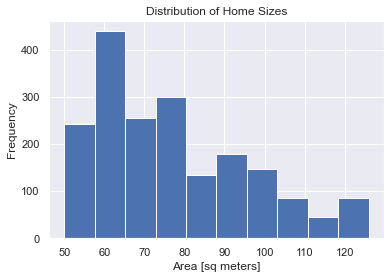

In [11]:
# Build histogram

plt.hist(
     df1_subset["surface_covered_in_m2"],
    #vert=False
)


# Label x-axis
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Sizes")

# save as an image
plt.savefig("images/1-1.png", dpi=150)

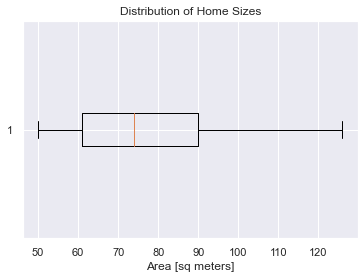

In [12]:
# Build a boxplot

plt.boxplot(
     df1_subset["surface_covered_in_m2"],
    vert=False
)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

# save as an image
plt.savefig("images/1-2.png", dpi=150)

#### Lat and Lon columns

Looking at the **"lat-lon"** column, we will observe that the data type is an object instead of float, and also the column is supposed to be seperated into **"lat"** and **"lon"** seperate columns. 

In [13]:
df1_subset[["lat", "lon"]] = df1_subset["lat-lon"].str.split(",", expand=True).astype(float)

df1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 4627
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1910 non-null   object 
 1   property_type               1910 non-null   object 
 2   place_with_parent_names     1910 non-null   object 
 3   lat-lon                     1795 non-null   object 
 4   price                       1910 non-null   float64
 5   currency                    1910 non-null   object 
 6   price_aprox_local_currency  1910 non-null   float64
 7   price_aprox_usd             1910 non-null   float64
 8   surface_total_in_m2         286 non-null    float64
 9   surface_covered_in_m2       1910 non-null   float64
 10  price_usd_per_m2            157 non-null    float64
 11  price_per_m2                1910 non-null   float64
 12  floor                       0 non-null      float64
 13  rooms                       8 non

#### State and Neighborhood columns

In [14]:
df1_subset["borough"] = df1_subset["place_with_parent_names"].str.split("|", expand=True)[1]

df1_subset.drop(columns=["lat-lon", "place_with_parent_names"], inplace=True)
#df1_subset.info()
df1_subset.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,borough
0,sell,apartment,5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851852,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...,23.634501,-102.552788,Miguel Hidalgo
2,sell,apartment,926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...,19.279771,-99.234597,Tlalpan
5,sell,apartment,4416000.0,MXN,4376051.62,232663.51,NaN,87.0,NaN,50758.620690,NaN,NaN,NaN,http://anzures.properati.com.mx/opct_venta_dep...,19.432657,-99.177444,Miguel Hidalgo
6,sell,apartment,3150000.0,MXN,3122244.47,166001.78,NaN,100.0,NaN,31500.000000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/r3a9_ven...,19.367025,-99.170349,Benito Juárez
11,sell,apartment,1784569.0,MXN,1768425.20,94022.66,NaN,57.0,NaN,31308.228070,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/pdji_ven...,23.634501,-102.552788,Benito Juárez


#### Drop Columns: Low and High cardinality

Columns with one category or to much categories will not provide any unique infomation to our model. So we will have to drop columns with one category and columns wih too much info.

In [15]:
df1_subset.select_dtypes("object").nunique()

operation           1
property_type       1
currency            1
properati_url    1910
borough            15
dtype: int64

In [16]:
# Drop Low and High cardinality categorical variables
df1_subset.drop(columns = ["operation", "property_type", "currency", "properati_url"], inplace = True)

#### Drop Columns: Leakages

It is important to drop columns or features that would the model information that it is not supposed to have access to when it is deployed. These columns will give the model an idea of the target.

In [17]:
sorted(df1_subset.columns)

['borough',
 'expenses',
 'floor',
 'lat',
 'lon',
 'price',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'price_per_m2',
 'price_usd_per_m2',
 'rooms',
 'surface_covered_in_m2',
 'surface_total_in_m2']

In [18]:
# Drop Leakage columns
df1_subset.drop(columns = ["price", "price_aprox_local_currency", "price_per_m2", "price_usd_per_m2"], inplace = True)

In [19]:
df1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 4627
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        1910 non-null   float64
 1   surface_total_in_m2    286 non-null    float64
 2   surface_covered_in_m2  1910 non-null   float64
 3   floor                  0 non-null      float64
 4   rooms                  8 non-null      float64
 5   expenses               0 non-null      float64
 6   lat                    1795 non-null   float64
 7   lon                    1795 non-null   float64
 8   borough                1910 non-null   object 
dtypes: float64(8), object(1)
memory usage: 149.2+ KB


#### Drop Columns: Null Columns

Dropping columns with high null values.

In [20]:
df1_subset.isnull().sum()

price_aprox_usd             0
surface_total_in_m2      1624
surface_covered_in_m2       0
floor                    1910
rooms                    1902
expenses                 1910
lat                       115
lon                       115
borough                     0
dtype: int64

In [21]:
# Drop Null columns
df1_subset.drop(columns = ["floor", "expenses"], inplace = True)
df1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 4627
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        1910 non-null   float64
 1   surface_total_in_m2    286 non-null    float64
 2   surface_covered_in_m2  1910 non-null   float64
 3   rooms                  8 non-null      float64
 4   lat                    1795 non-null   float64
 5   lon                    1795 non-null   float64
 6   borough                1910 non-null   object 
dtypes: float64(6), object(1)
memory usage: 119.4+ KB


#### Drop Columns: Muliticollinearity

Check for features that are highl correlated with each other and then pick just one. We will use a **heatmap**

In [22]:
# Check correlation using heatmap
corr = df1_subset.select_dtypes("number").drop(columns = "price_aprox_usd").corr()
corr

,surface_total_in_m2,surface_covered_in_m2,rooms,lat,lon
surface_total_in_m2,1.000000,0.341759,0.394654,0.114364,-0.058259
surface_covered_in_m2,0.341759,1.000000,0.388463,-0.014582,-0.027696
rooms,0.394654,0.388463,1.000000,-0.774708,-0.179361
lat,0.114364,-0.014582,-0.774708,1.000000,-0.990377
lon,-0.058259,-0.027696,-0.179361,-0.990377,1.000000


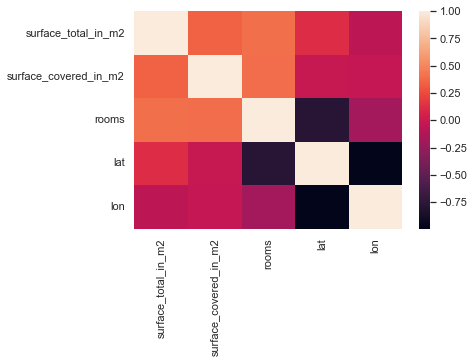

In [23]:
sns.heatmap(corr)

# save as an image
plt.savefig("images/1-3.png", dpi=150)

In [24]:
# Drop columns with multicollinearity
df1_subset.drop(columns = ["rooms", "surface_total_in_m2"], inplace = True)

In [25]:
df1_subset.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
2,48822.82,100.0,19.279771,-99.234597,Tlalpan
5,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo
6,166001.78,100.0,19.367025,-99.170349,Benito Juárez
11,94022.66,57.0,23.634501,-102.552788,Benito Juárez


<font size="+1"><strong>2. Wrangle Function</strong></font>

One way to automate the data importing and cleaning process is by writing a **function**. Since we have a collection of data, this will make sure that all our data undergoes the same process, and that the analysis is easily reproducible — something that's very important in science in general and data science in particular. 

In [26]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    # Subset data: Apartments in "Distrito Federal", less than 400,000
    state = df["place_with_parent_names"].str.contains("Distrito Federal")
    apt = df["property_type"] == "apartment"
    price = df["price_aprox_usd"] < 400_000
    
    df = df[state & apt & price]

    #Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    area = df["surface_covered_in_m2"].between(low, high)
    df = df[area]

    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    
    # create neighborhood column
    df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[1]
    
    # drop columns
    df.drop(columns=["lat-lon", "place_with_parent_names"], inplace=True)
    
    # Drop Low and High cardinality categorical variables
    df.drop(columns = ["operation", "property_type", "currency", "properati_url"], inplace = True)
    
    # Drop Leakage columns
    df.drop(columns = ["price", "price_aprox_local_currency", "price_per_m2", "price_usd_per_m2"], inplace = True)
    
    # Drop Null columns
    df.drop(columns = ["floor", "expenses"], inplace = True)
    
    # Drop columns with multicollinearity
    df.drop(columns = ["rooms", "surface_total_in_m2"], inplace = True)
    
    return df

In [27]:
df1 = wrangle("data/mexico-city-real-estate-1.csv")
df2 = wrangle("data/mexico-city-real-estate-2.csv")
df3 = wrangle("data/mexico-city-real-estate-3.csv")
df4 = wrangle("data/mexico-city-real-estate-4.csv")
df5 = wrangle("data/mexico-city-real-estate-5.csv")

Use [`glob`](https://docs.python.org/3/library/glob.html#glob.glob) to create a list that contains the filenames for all the Mexico City real estate CSV files in the directory.


In [28]:
files = glob("data/mexico-city-real-estate-*.csv")
files

['data\\mexico-city-real-estate-1.csv',
 'data\\mexico-city-real-estate-2.csv',
 'data\\mexico-city-real-estate-3.csv',
 'data\\mexico-city-real-estate-4.csv',
 'data\\mexico-city-real-estate-5.csv']

The next step is to read each of the CSVs in `files` into a DataFrame, and put all of those DataFrames into a list. What's a good way to iterate through `files` so we can do this? A `for` loop!

In [29]:
frames = [wrangle(file) for file in files]

In [30]:
frames = []
for file in files:
    df = wrangle(file)
    frames.append(df)

The final step is to use pandas to combine all the DataFrames in `frames`. 

Use [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concatenate the items in `frames` into a single DataFrame `df`. Make sure you set the `ignore_index` argument to `True`.

In [31]:
df = pd.concat(frames, ignore_index=True)
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
1,48822.82,100.0,19.279771,-99.234597,Tlalpan
2,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo
3,166001.78,100.0,19.367025,-99.170349,Benito Juárez
4,94022.66,57.0,23.634501,-102.552788,Benito Juárez


In [32]:
df.shape

(9330, 5)

## Save the clean data as a new csv file "`mexico-real-estate-clean.csv`"

In [33]:
df.to_csv("data/mexico-city-real-estate-clean.csv", index=False)